In [88]:
import matplotlib.pyplot as plt
import pickle

perturbation="0.1"
sg="0.012589254117941675"

with open(f"results/sg_{sg}_pert_{perturbation}_nruns_10.pkl", "rb") as f:
    results = pickle.load(f)


In [89]:
key = [ k for k in results if k[0] == "DDM"][0]
y_true, y_pred = results[key]["y_true"], results[key]["y_pred"]
print(len(y_true), len(y_pred))

20 20


In [90]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresh = roc_curve(y_true, y_pred)
best_thresh = thresh[np.argmax(tpr - fpr)]

print("best threshold", best_thresh)

y_pred = (y_pred >= best_thresh).astype(int)

print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

best threshold 1.0
0.65
0.46153846153846156


In [91]:
from glob import glob
import re

supports = []
f1s = {}
accuacies = {}

for fname in glob("results/*.pkl"):
    sg = float(re.search("sg_(.*)_pert", fname).group(1))
    
    with open(fname, "rb") as f:
        results = pickle.load(f)

    if len(results) < 5:
        continue
    
    supports.append(sg)

    for key in results:
        y_true, y_pred = results[key]["y_true"], results[key]["y_pred"]
        fpr, tpr, thresh = roc_curve(y_true, y_pred)
        best_thresh = thresh[np.argmax(tpr - fpr)]
        y_pred = (y_pred >= best_thresh).astype(int)
        model_name, config = key

        if model_name not in f1s:
            f1s[model_name] = []
            accuacies[model_name] = []

        f1s[model_name].append(f1_score(y_true, y_pred))
        accuacies[model_name].append(accuracy_score(y_true, y_pred))

supports = np.array(supports)
f1s = { k: np.array(v)[np.argsort(supports)] for k, v in f1s.items() }
accuacies = { k: np.array(v)[np.argsort(supports)] for k, v in accuacies.items() }
supports = np.sort(supports)

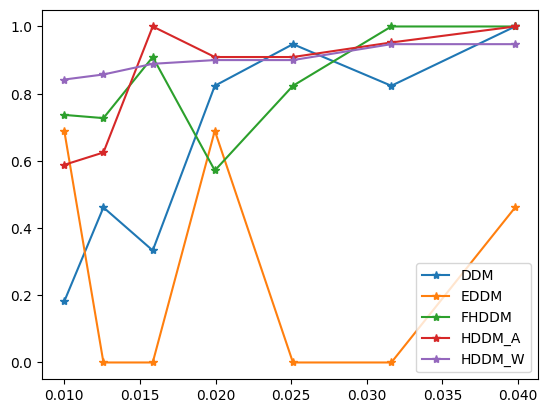

In [92]:
for model, perf in f1s.items():
    plt.plot(supports, perf, label=model, marker='*')
plt.legend()